<a href="https://colab.research.google.com/github/Arifuzzamanjoy/RU-Audio/blob/main/load_and_explore_audio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Load and explore audio**

In [ ]:
!pip install datasets[audio]


In [20]:
from datasets import load_dataset

minds = load_dataset("PolyAI/minds14", name="en-AU", split="train")
minds

Generating train split: 0 examples [00:00, ? examples/s]

Dataset({
    features: ['path', 'audio', 'transcription', 'english_transcription', 'intent_class', 'lang_id'],
    num_rows: 654
})

In [21]:
example = minds[0]
example

{'path': '/root/.cache/huggingface/datasets/downloads/extracted/a19fbc5032eacf25eab0097832db7b7f022b42104fbad6bd5765527704a428b9/en-AU~PAY_BILL/response_4.wav',
 'audio': {'path': '/root/.cache/huggingface/datasets/downloads/extracted/a19fbc5032eacf25eab0097832db7b7f022b42104fbad6bd5765527704a428b9/en-AU~PAY_BILL/response_4.wav',
  'array': array([ 0.        ,  0.00024414, -0.00024414, ..., -0.00024414,
          0.00024414,  0.0012207 ]),
  'sampling_rate': 8000},
 'transcription': 'I would like to pay my electricity bill using my card can you please assist',
 'english_transcription': 'I would like to pay my electricity bill using my card can you please assist',
 'intent_class': 13,
 'lang_id': 2}

In [22]:
id2label = minds.features["intent_class"].int2str
id2label(example["intent_class"])

'pay_bill'

In [23]:
columns_to_remove = ["lang_id", "english_transcription"]
minds = minds.remove_columns(columns_to_remove)
minds

Dataset({
    features: ['path', 'audio', 'transcription', 'intent_class'],
    num_rows: 654
})

In [ ]:
!pip install gradio

In [26]:
import gradio as gr


def generate_audio():
    example = minds.shuffle()[0]
    audio = example["audio"]
    return (
        audio["sampling_rate"],
        audio["array"],
    ), id2label(example["intent_class"])


with gr.Blocks() as demo:
    with gr.Column():
        for _ in range(4):
            audio, label = generate_audio()
            output = gr.Audio(audio, label=label)

demo.launch(debug=True)

/usr/local/lib/python3.10/dist-packages/gradio/processing_utils.py:183: UserWarning: Trying to convert audio automatically from float64 to 16-bit int format.
  warnings.warn(warning.format(data.dtype))


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

Keyboard interruption in main thread... closing server.


In [27]:
!pip install librosa

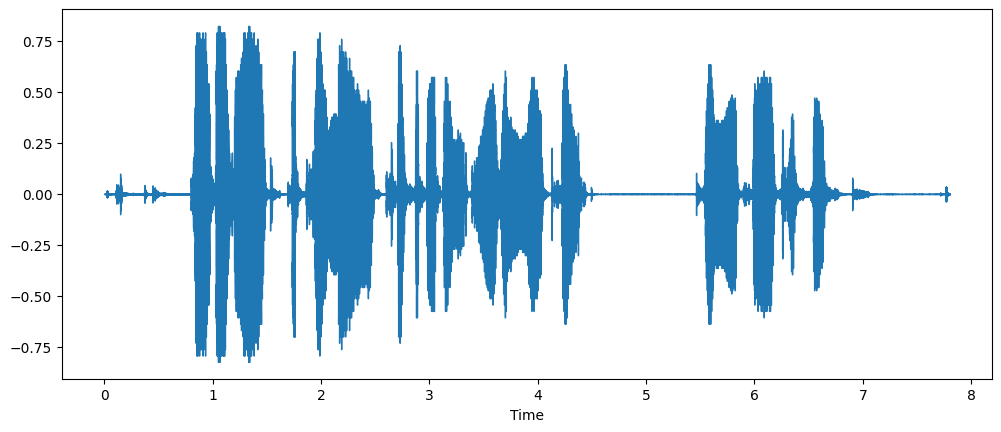

In [28]:
import librosa
import matplotlib.pyplot as plt
import librosa.display

array = example["audio"]["array"]
sampling_rate = example["audio"]["sampling_rate"]

plt.figure().set_figwidth(12)
librosa.display.waveshow(array, sr=sampling_rate)


In [29]:
librosa.stft(array)


array([[-7.00534669e-03+0.j        , -1.80677877e-03+0.j        ,
         2.34685573e-03+0.j        , ..., -3.12220549e-03+0.j        ,
        -1.19022049e-02+0.j        , -1.46084515e-02+0.j        ],
       [ 6.75912898e-03-0.00243868j, -2.23196140e-05+0.00755645j,
        -3.23982214e-03-0.0034857j , ...,  3.41838246e-04-0.00046604j,
         9.27362976e-03-0.00838052j,  6.04030351e-03+0.00558849j],
       [-5.42647155e-03+0.00327536j, -2.22486117e-05-0.00664303j,
         2.71843256e-03+0.00671436j, ..., -1.16685191e-03-0.00489725j,
         9.59992463e-04+0.01578678j,  8.66851906e-03-0.01764861j],
       ...,
       [ 1.99384815e-03+0.00144729j,  6.08932006e-04-0.00462719j,
        -1.69907174e-03+0.00953456j, ..., -7.28271505e-04+0.00139035j,
         1.20694168e-04-0.00519332j, -1.99884733e-03+0.00249502j],
       [-2.37311709e-03-0.00026521j,  2.32684256e-03+0.00406064j,
         3.98342241e-04-0.00485515j, ..., -4.77142883e-03+0.00021662j,
        -6.87859953e-04+0.00486812j

In [30]:
stft_matrix = librosa.stft(array)

In [31]:
stft_db = librosa.amplitude_to_db(abs(stft_matrix))


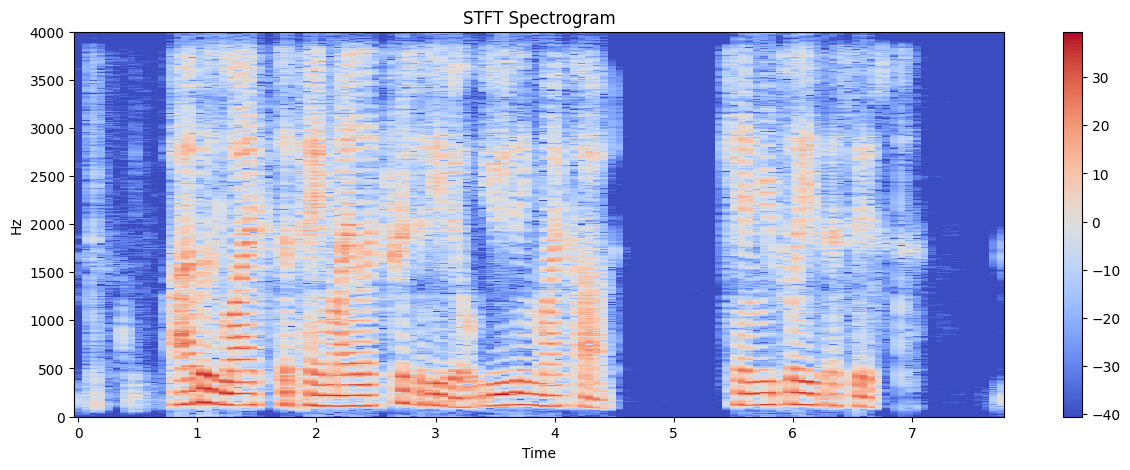

In [32]:
plt.figure(figsize=(15, 5))
librosa.display.specshow(stft_db, sr=sampling_rate, x_axis='time', y_axis='hz')
plt.colorbar()
plt.title('STFT Spectrogram')
plt.show()